In [265]:
import pandas as pd

In [266]:
reaction = pd.read_csv('data/Reactions.csv')
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [267]:
rxntype = pd.read_csv('data/ReactionTypes.csv')
rxntype.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [268]:
content = pd.read_csv('data/Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


### Cleaning Data

In [269]:
#removing rows that have missing values
reaction.dropna(axis=0, inplace=True)
rxntype.dropna(axis=0, inplace=True)
content.dropna(axis=0, inplace=True)

In [270]:
reaction.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object

In [271]:
rxntype.dtypes

Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object

In [272]:
content.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [273]:
#removing columns that may not be relevant
reaction.drop(['User ID'], axis=1, inplace=True)

In [274]:
reaction.head()

,Unnamed: 0,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [275]:
rxntype.drop(['Sentiment'], axis=1, inplace=True)
content.drop(['User ID', 'URL'], axis=1, inplace=True)

In [276]:
rxntype.head()

,Unnamed: 0,Type,Score
0,0,heart,60
1,1,want,70
2,2,disgust,0
3,3,hate,5
4,4,interested,30


In [277]:
content.head()

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


### Data Modeling

In [278]:
#merging 3 tables together
newdf = pd.merge(reaction, rxntype, how='left', on=['Type'])
# newdf = newdf.rename(columns={'Type_y': 'Content Type'})
newdf.head()

,Unnamed: 0_x,Content ID,Type,Datetime,Unnamed: 0_y,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,2,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,11,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,14,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,2,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,4,30


In [279]:
resdf = pd.merge(content, newdf, how='left', on=['Content ID'])
resdf.head()

,Unnamed: 0,Content ID,Type_x,Category,Unnamed: 0_x,Type_y,Datetime,Unnamed: 0_y,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1.0,disgust,2020-11-07 09:43:50,2.0,0.0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,2.0,dislike,2021-06-17 12:22:51,11.0,10.0
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,3.0,scared,2021-04-18 05:13:58,14.0,15.0
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4.0,disgust,2021-01-06 19:13:01,2.0,0.0
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5.0,interested,2020-08-23 12:25:58,4.0,30.0


In [280]:
resdf = resdf.rename(columns={'Type_x': 'Content Type', 'Type_y':'Rxn Type'})
resdf.head()

,Unnamed: 0,Content ID,Content Type,Category,Unnamed: 0_x,Rxn Type,Datetime,Unnamed: 0_y,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1.0,disgust,2020-11-07 09:43:50,2.0,0.0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,2.0,dislike,2021-06-17 12:22:51,11.0,10.0
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,3.0,scared,2021-04-18 05:13:58,14.0,15.0
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4.0,disgust,2021-01-06 19:13:01,2.0,0.0
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5.0,interested,2020-08-23 12:25:58,4.0,30.0


In [281]:
resdf.to_csv('data/cleaned-data.csv')

In [282]:
#Top 5 performing categories
top5 = resdf.groupby('Category')['Score'].sum()
top5 = top5.sort_values(ascending=False)
top5 = top5.head(5)
top5

Category
travel            53935.0
science           53657.0
healthy eating    52745.0
animals           52443.0
cooking           49681.0
Name: Score, dtype: float64

In [283]:
top5.to_csv('data/top5categories.csv')

### Data Visualization

In [284]:
import matplotlib.pyplot as plt

In [285]:
top5 = pd.DataFrame(top5)
top5.head()

,Score
Category,
travel,53935.0
science,53657.0
healthy eating,52745.0
animals,52443.0
cooking,49681.0


array([<AxesSubplot:ylabel='Score'>], dtype=object)

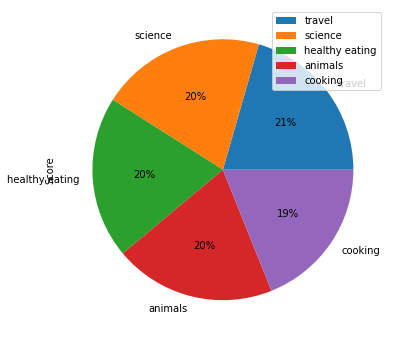

In [286]:
top5.plot(kind='pie', figsize=(10,6), autopct='%1.0f%%', subplots=True)

<AxesSubplot:xlabel='Category'>

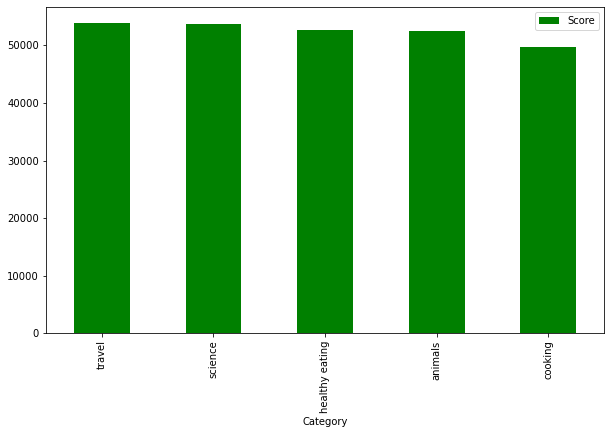

In [287]:
top5.plot(kind='bar', figsize=(10,6), color='green')

### Some Storytelling

#### The below code shows all the unique categories that exist within the dataset.

In [294]:
#all unique categories
un = resdf['Category'].unique()
un

array(['Studying', 'healthy eating', 'technology', 'food', 'dogs',
       'soccer', 'public speaking', 'tennis', 'travel', 'education',
       'studying', 'science', 'veganism', 'cooking', 'animals', 'fitness',
       'culture'], dtype=object)

#### The below calculations show that the total number of reactions of the most popular category, which is Travel, is 1368.

In [295]:
#total reactions of the most popular category
traveldf = resdf.loc[resdf['Category']=='travel']
traveldf.head()

,Unnamed: 0,Content ID,Content Type,Category,Unnamed: 0_x,Rxn Type,Datetime,Unnamed: 0_y,Score,month
272,14,e6ee2244-9382-49a9-8cbf-fa54aaaa2392,audio,travel,355.0,intrigued,2021-03-03 18:40:34,12.0,45.0,3.0
474,24,bda0b065-7f8b-4d52-b7e9-fcc375cdab08,photo,travel,622.0,super love,2020-12-27 17:21:20,7.0,75.0,12.0
475,24,bda0b065-7f8b-4d52-b7e9-fcc375cdab08,photo,travel,623.0,worried,2021-05-21 11:57:48,15.0,12.0,5.0
476,24,bda0b065-7f8b-4d52-b7e9-fcc375cdab08,photo,travel,624.0,heart,2021-02-24 18:34:14,0.0,60.0,2.0
477,24,bda0b065-7f8b-4d52-b7e9-fcc375cdab08,photo,travel,625.0,like,2021-06-14 17:44:08,10.0,50.0,6.0


In [290]:
traveldf['Rxn Type'].shape[0]

1368

#### The below code shows that the month with the most posts is August.

In [296]:
#month with the most posts
import datetime
resdf['month'] = pd.DatetimeIndex(resdf['Datetime']).month
resdf.head()

,Unnamed: 0,Content ID,Content Type,Category,Unnamed: 0_x,Rxn Type,Datetime,Unnamed: 0_y,Score,month
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1.0,disgust,2020-11-07 09:43:50,2.0,0.0,11.0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,2.0,dislike,2021-06-17 12:22:51,11.0,10.0,6.0
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,3.0,scared,2021-04-18 05:13:58,14.0,15.0,4.0
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4.0,disgust,2021-01-06 19:13:01,2.0,0.0,1.0
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5.0,interested,2020-08-23 12:25:58,4.0,30.0,8.0


In [297]:
resdf['month'].value_counts()

8.0     1612
5.0     1606
12.0    1585
1.0     1573
10.0    1553
7.0     1542
11.0    1514
3.0     1502
9.0     1501
4.0     1496
6.0     1474
2.0     1426
Name: month, dtype: int64